In [1]:
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.metrics
import sklearn

In [2]:
labels_df = pd.read_csv('../../stats/all-labels.csv')
display(labels_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake
0,9a22372d22a52397.mp4,1,1.0,1.0,0,1
1,9bc4f1306bb8e2cd.mp4,1,1.0,1.0,0,1
2,88fe2a902a9d8cc7.mp4,1,1.0,1.0,0,1
3,1f3cbda142d0944a.mp4,1,1.0,1.0,0,1
4,63bed62257daccaf.mp4,1,1.0,1.0,0,1
...,...,...,...,...,...,...
6938,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0
6939,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0
6940,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0
6941,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0


In [39]:
# preds_path = '../../stats/sync-vid-preds-211129-0205.csv'
preds_path = '../../stats/sync-vid-preds-211129-1540.csv'
face_sync_df = pd.read_csv(preds_path)
display(face_sync_df)

,filename,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,std_pred,max_pred,min_pred,face_no
0,3dbe8314b86284eb.mp4,0.141936,0.119926,0.092809,0.155175,0.102145,0.603216,0.040670,1
1,1b8d86fe4003ec39.mp4,0.053385,0.029906,0.012084,0.054604,0.075542,0.382673,0.002555,0
2,cabecda3272f85d1.mp4,0.075471,0.066416,0.035870,0.108817,0.053307,0.262790,0.011583,0
3,8a715b8d45ad42bb.mp4,0.995181,0.999848,0.995189,0.999962,0.009428,1.000000,0.961557,0
4,751dc59c35c1809d.mp4,0.197437,0.195674,0.143400,0.247612,0.067825,0.351233,0.040927,0
...,...,...,...,...,...,...,...,...,...
3262,aace3bd7f5c15109.mp4,0.321634,0.289735,0.237510,0.358913,0.144508,0.933994,0.185954,0
3263,a906a11a463e2fd1.mp4,0.993590,0.999564,0.998669,0.999995,0.014854,1.000000,0.941362,0
3264,2ec139efc01c35b1.mp4,0.122097,0.104968,0.078590,0.169674,0.064846,0.309485,0.016150,1
3265,0e4acde05b3af5b6.mp4,0.463815,0.458332,0.337953,0.573723,0.211492,0.988530,0.140412,0


In [40]:
face_sync_df = face_sync_df.groupby('filename', sort=False).agg(min)
sync_df = pd.merge(
    left=labels_df, right=face_sync_df, 
    left_on='filename', right_on='filename'
)
# print(np.unique(sync_df['face_no']))
display(sync_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,std_pred,max_pred,min_pred,face_no
0,18351609de111566.mp4,1,0.0,0.0,1,0,0.698996,0.710788,0.514393,0.962517,0.255758,0.999795,0.032149,0
1,5026338ed12800bc.mp4,1,0.0,0.0,1,0,0.725179,0.796039,0.533570,0.949421,0.238619,0.999502,0.131079,0
2,5968740ef3396f0c.mp4,1,0.0,0.0,1,0,0.653393,0.595386,0.456488,0.886616,0.254039,0.998166,0.053344,0
3,50e301013618719d.mp4,1,0.0,0.0,1,0,0.486940,0.447013,0.345664,0.588433,0.198489,0.980383,0.222443,0
4,bc6dd15cfdfe6175.mp4,1,0.0,0.0,1,0,0.664852,0.638393,0.487873,0.936314,0.248515,0.998353,0.169628,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.322907,0.264653,0.209240,0.322427,0.193540,0.844284,0.109108,0
3263,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.072838,0.061604,0.039625,0.086768,0.045013,0.232173,0.014746,0
3264,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.110941,0.087360,0.041453,0.129238,0.108267,0.567519,0.009253,0
3265,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.435390,0.381756,0.231175,0.547125,0.266486,0.978735,0.073928,0


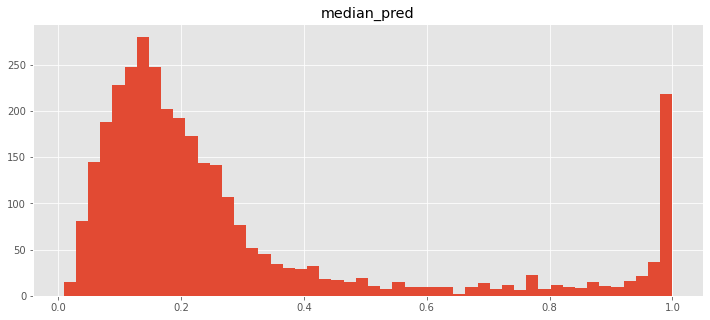

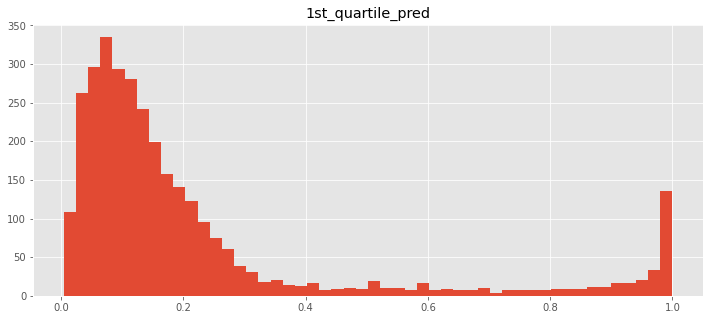

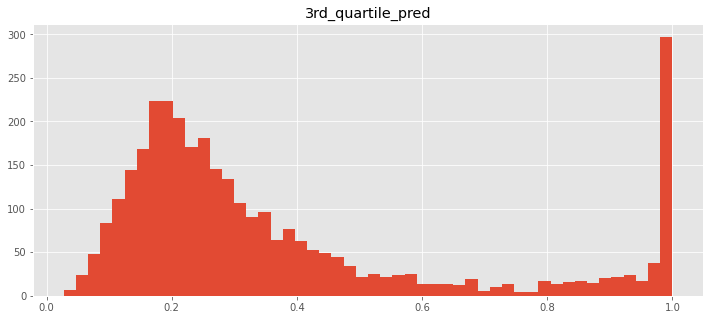

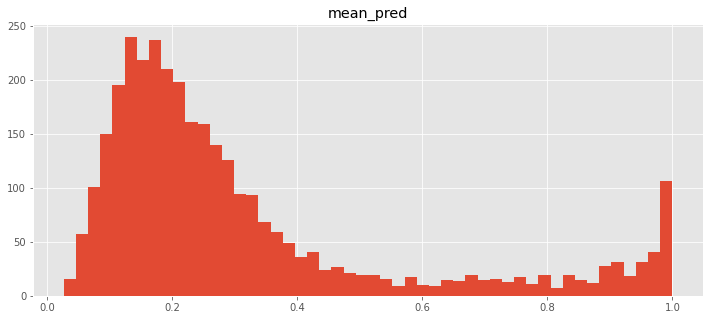

In [41]:
for metric in ['median_pred', '1st_quartile_pred', '3rd_quartile_pred', 'mean_pred']:
    preds = sync_df[metric]
    plt.style.use('ggplot')
    plt.figure(figsize=(12, 5))
    plt.title(metric)
    plt.hist(preds, density=False, bins=50)  # density=False would make counts

In [42]:
rsync_df = sync_df[
    (sync_df['swap_fake'] == 1) |
    (sync_df['label'] == 0)
]
display(rsync_df)

,filename,label,audio_fake,face_fake,swap_fake,both_fake,mean_pred,median_pred,1st_quartile_pred,3rd_quartile_pred,std_pred,max_pred,min_pred,face_no
0,18351609de111566.mp4,1,0.0,0.0,1,0,0.698996,0.710788,0.514393,0.962517,0.255758,0.999795,0.032149,0
1,5026338ed12800bc.mp4,1,0.0,0.0,1,0,0.725179,0.796039,0.533570,0.949421,0.238619,0.999502,0.131079,0
2,5968740ef3396f0c.mp4,1,0.0,0.0,1,0,0.653393,0.595386,0.456488,0.886616,0.254039,0.998166,0.053344,0
3,50e301013618719d.mp4,1,0.0,0.0,1,0,0.486940,0.447013,0.345664,0.588433,0.198489,0.980383,0.222443,0
4,bc6dd15cfdfe6175.mp4,1,0.0,0.0,1,0,0.664852,0.638393,0.487873,0.936314,0.248515,0.998353,0.169628,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3262,f5c4bfb20068f129.mp4,0,0.0,0.0,0,0,0.322907,0.264653,0.209240,0.322427,0.193540,0.844284,0.109108,0
3263,b7b7b7f6db7f6e2e.mp4,0,0.0,0.0,0,0,0.072838,0.061604,0.039625,0.086768,0.045013,0.232173,0.014746,0
3264,c3fc75289ae3b41e.mp4,0,0.0,0.0,0,0,0.110941,0.087360,0.041453,0.129238,0.108267,0.567519,0.009253,0
3265,519e97d4c90aaa1c.mp4,0,0.0,0.0,0,0,0.435390,0.381756,0.231175,0.547125,0.266486,0.978735,0.073928,0


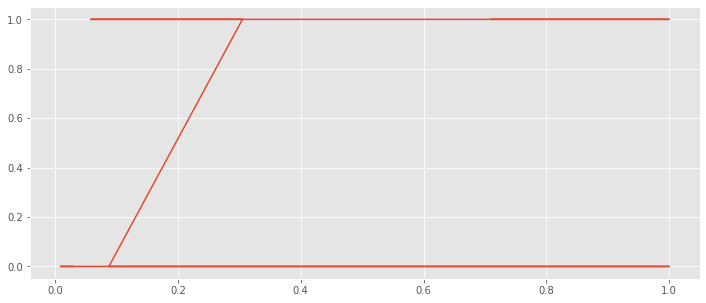

In [43]:
r_preds, r_labels = rsync_df['median_pred'], rsync_df['label']
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.plot(r_preds, r_labels)

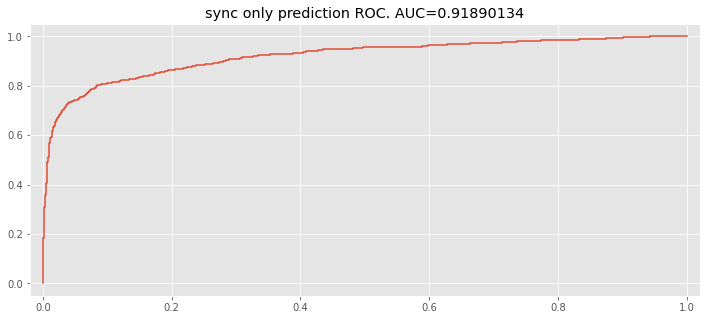

In [44]:
fpr, tpr, _ = sklearn.metrics.roc_curve(r_labels, r_preds)
auc = sklearn.metrics.roc_auc_score(r_labels, r_preds)

plt.style.use('ggplot')
plt.figure(figsize=(12, 5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05])
plt.title("sync only prediction ROC. AUC="+str(round(auc, 10)))
plt.plot(fpr, tpr)

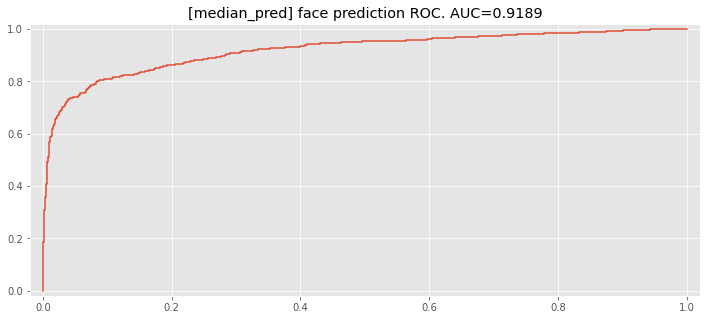

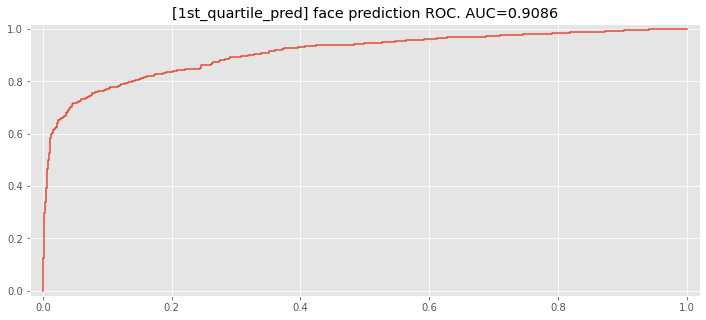

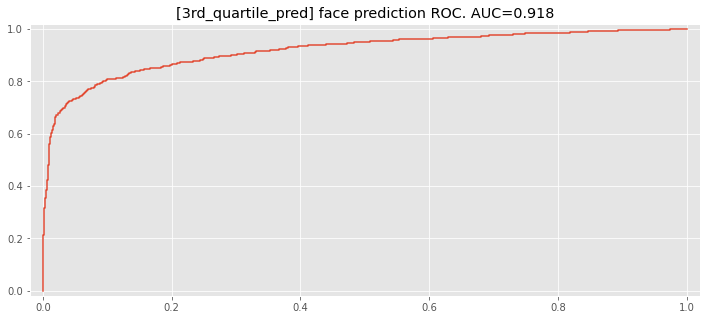

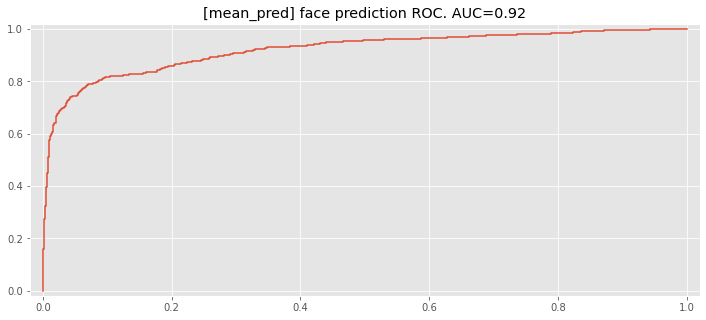

In [45]:
for metric in ['median_pred', '1st_quartile_pred', '3rd_quartile_pred', 'mean_pred']:
    labels = rsync_df['label'].to_numpy()
    sync_preds = rsync_df[metric].to_numpy()
    fpr, tpr, _ = sklearn.metrics.roc_curve(labels, sync_preds)
    auc = sklearn.metrics.roc_auc_score(labels, sync_preds)

    plt.style.use('ggplot')
    plt.figure(figsize=(12, 5))
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.title(f"[{metric}] face prediction ROC. AUC="+str(round(auc, 4)))
    plt.plot(fpr, tpr)